## KNN 분류분석 ( K-Nearest Neighbors )

In [1]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

plt.rc('font', family='malgun gothic')    # 한글처리
plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [3]:
# 붓꽃 Data Set Load

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [6]:
# 훈련 데이터와 테스트 데이터 분리 ( Test 용이 20%)
# KNN Model 생성
knn = KNeighborsClassifier(n_neighbors = 3)

In [7]:
knn.fit(X_train, y_train) #모델을 Test Set 으로 훈련

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Test Set에 대한 예측

y_pred = knn.predict(X_test)

# 정확도 출력

accuracy = accuracy_score(y_test,y_pred)
print(f'정확도: {accuracy:.2f}')

정확도: 1.00


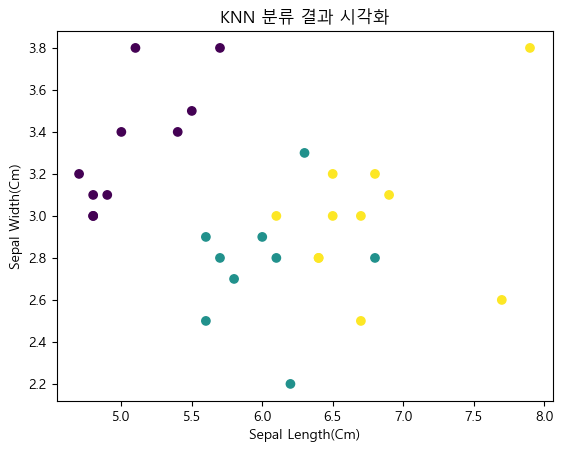

In [15]:
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred, cmap ='viridis')
plt.xlabel('Sepal Length(Cm)')
plt.ylabel('Sepal Width(Cm)')
plt.title('KNN 분류 결과 시각화')
plt.show()

## 농구선수 분류 KNN

In [16]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

plt.rc('font', family='malgun gothic')    # 한글처리
plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [19]:
df = pd.read_csv('Data/basketball_final.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rebounds   1340 non-null   float64
 1   Assists    1340 non-null   float64
 2   Steals     1340 non-null   float64
 3   Blocks     1340 non-null   float64
 4   Turnovers  1340 non-null   float64
 5   Target     1340 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


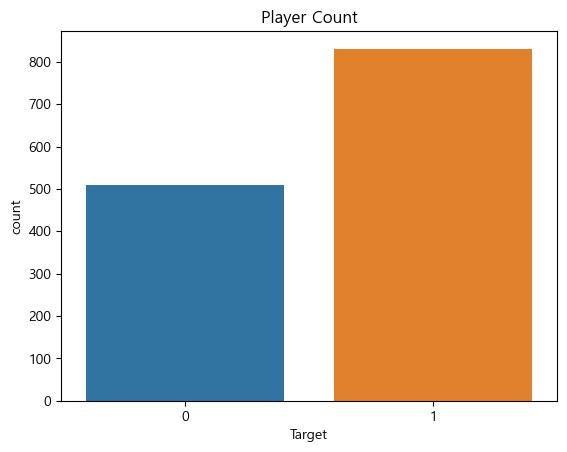

In [22]:
# target 별 선수의 수 (countplot)

sns.countplot(x='Target', data = df)
plt.title("Player Count")
plt.show()         

In [23]:
df['Rebounds'].groupby(df['Target']).mean()

Target
0    2.247544
1    3.516486
Name: Rebounds, dtype: float64

In [25]:
df.groupby(df['Target']).mean()

,Rebounds,Assists,Steals,Blocks,Turnovers
Target,,,,,
0,2.247544,1.221022,0.498232,0.253438,0.942240
1,3.516486,1.752347,0.692178,0.439110,1.347533


In [30]:
print(f"리바운드\n {df['Rebounds'].groupby(df['Target']).mean()}")
print(f"어시스트\n {df['Assists'].groupby(df['Target']).mean()}")
print(f"스틸\n {df['Steals'].groupby(df['Target']).mean()}")
print(f"블록\n {df['Blocks'].groupby(df['Target']).mean()}")
print(f"턴오버\n {df['Turnovers'].groupby(df['Target']).mean()}")

리바운드
 Target
0    2.247544
1    3.516486
Name: Rebounds, dtype: float64
어시스트
 Target
0    1.221022
1    1.752347
Name: Assists, dtype: float64
스틸
 Target
0    0.498232
1    0.692178
Name: Steals, dtype: float64
블록
 Target
0    0.253438
1    0.439110
Name: Blocks, dtype: float64
턴오버
 Target
0    0.942240
1    1.347533
Name: Turnovers, dtype: float64


In [33]:
x=df[['Rebounds','Assists','Steals','Blocks','Turnovers']]
y=df[['Target']]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [40]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(x_train, y_train) #모델을 Test Set 으로 훈련

KNeighborsClassifier()

In [42]:
y_pred = knn.predict(x_test)

# 정확도 출력

accuracy = accuracy_score(y_test,y_pred)
print(f'정확도: {accuracy:.2f}')

정확도: 0.60


In [44]:
n = KNeighborsClassifier(n_neighbors = 5)
n.fit(x_train, y_train) #모델을 Test Set 으로 훈련
new_x = [3,3,2,2,4]
prediction = n.predict([new_x])
print(prediction)

[1]


In [51]:
n = KNeighborsClassifier(n_neighbors = 5)
n.fit(x_train, y_train) #모델을 Test Set 으로 훈련
new_x = [2,1,0,0,0]
prediction = n.predict([new_x])
print(prediction)

[1]
